In [20]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [2]:
PG = wb.DataReader('PG', data_source='yahoo', start='1995-1-1')

In [3]:
PG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1995-01-03,15.62500,15.43750,15.46875,15.59375,3318400.0,8.114557
1995-01-04,15.65625,15.31250,15.53125,15.46875,2218800.0,8.049510
1995-01-05,15.43750,15.21875,15.37500,15.25000,2319600.0,7.935676
1995-01-06,15.40625,15.15625,15.15625,15.28125,3438000.0,7.951943
1995-01-09,15.40625,15.18750,15.34375,15.21875,1795200.0,7.919417


In [4]:
PG.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-04-19,137.080002,135.389999,136.940002,136.610001,9149400.0,135.741531
2021-04-20,138.589996,133.529999,134.839996,137.750000,10040500.0,136.874283
2021-04-21,138.570007,136.600006,137.889999,136.850006,8465900.0,135.980011
2021-04-22,135.789993,134.059998,135.369995,134.630005,7338300.0,134.630005
2021-04-23,135.080002,133.250000,134.929993,133.940002,6708300.0,133.940002


## Simple Rate of Return

In [5]:
PG['simple_return'] = (PG['Adj Close'] / PG['Adj Close'].shift(1)) -1
print(PG['simple_return'])

Date
1995-01-03         NaN
1995-01-04   -0.008016
1995-01-05   -0.014142
1995-01-06    0.002050
1995-01-09   -0.004090
                ...   
2021-04-19   -0.004663
2021-04-20    0.008345
2021-04-21   -0.006534
2021-04-22   -0.009928
2021-04-23   -0.005125
Name: simple_return, Length: 6624, dtype: float64


<AxesSubplot:xlabel='Date'>

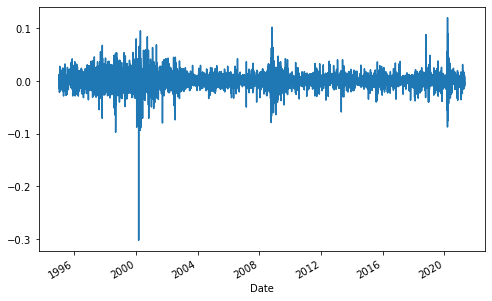

In [6]:
PG['simple_return'].plot(figsize=(8, 5))

In [8]:
avg_returns_d = PG["simple_return"].mean()
avg_returns_d

0.0005252590805045525

In [9]:
avg_returns_a = PG["simple_return"].mean() * 250
avg_returns_a

0.13131477012613813

In [12]:
print(str(round(avg_returns_a, 5) * 100) + ' %') 

13.131 %


## Log Returns

In [13]:
PG.head()

,High,Low,Open,Close,Volume,Adj Close,simple_return
Date,,,,,,,
1995-01-03,15.62500,15.43750,15.46875,15.59375,3318400.0,8.114557,NaN
1995-01-04,15.65625,15.31250,15.53125,15.46875,2218800.0,8.049510,-0.008016
1995-01-05,15.43750,15.21875,15.37500,15.25000,2319600.0,7.935676,-0.014142
1995-01-06,15.40625,15.15625,15.15625,15.28125,3438000.0,7.951943,0.002050
1995-01-09,15.40625,15.18750,15.34375,15.21875,1795200.0,7.919417,-0.004090


In [14]:
PG["log_return"] = np.log(PG['Adj Close'] / PG['Adj Close'].shift(1))
print(PG["log_return"])

Date
1995-01-03         NaN
1995-01-04   -0.008048
1995-01-05   -0.014243
1995-01-06    0.002048
1995-01-09   -0.004099
                ...   
2021-04-19   -0.004674
2021-04-20    0.008310
2021-04-21   -0.006555
2021-04-22   -0.009978
2021-04-23   -0.005138
Name: log_return, Length: 6624, dtype: float64


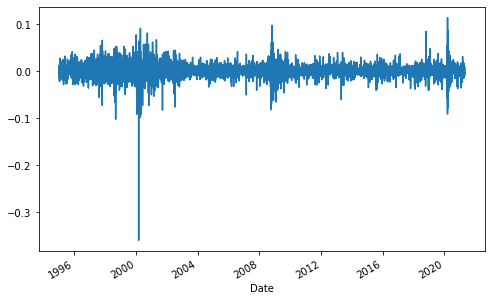

In [15]:
PG["log_return"].plot(figsize=(8, 5))
plt.show()

In [16]:
log_return_d = PG["log_return"].mean()
log_return_d

0.0004233326762325838

In [17]:
log_return_a = PG["log_return"].mean() * 250
log_return_a

0.10583316905814595

In [18]:
print(str(round(log_return_a, 5) * 100) + ' %')

10.583 %


## Multiple Securities

In [21]:
tickers = ["PG", "MSFT", "F", "GE"]
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source="yahoo", start="1995-1-1")["Adj Close"]

In [22]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6624 entries, 1995-01-03 to 2021-04-23
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      6624 non-null   float64
 1   MSFT    6624 non-null   float64
 2   F       6624 non-null   float64
 3   GE      6624 non-null   float64
dtypes: float64(4)
memory usage: 258.8 KB


In [23]:
mydata.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,8.114557,2.389259,4.380183,4.119593
1995-01-04,8.049510,2.406627,4.498034,4.119593
1995-01-05,7.935676,2.366929,4.458752,4.129690
1995-01-06,7.951943,2.406627,4.458752,4.109495
1995-01-09,7.919417,2.391740,4.537320,4.069108


In [24]:
mydata.tail()

,PG,MSFT,F,GE
Date,,,,
2021-04-19,135.741531,258.739990,12.11,13.46
2021-04-20,136.874283,258.260010,11.45,13.06
2021-04-21,135.980011,260.579987,11.73,13.35
2021-04-22,134.630005,257.170013,11.94,13.41
2021-04-23,133.940002,261.149994,12.22,13.55


In [25]:
mydata.iloc[0]

PG      8.114557
MSFT    2.389259
F       4.380183
GE      4.119593
Name: 1995-01-03 00:00:00, dtype: float64

<AxesSubplot:xlabel='Date'>

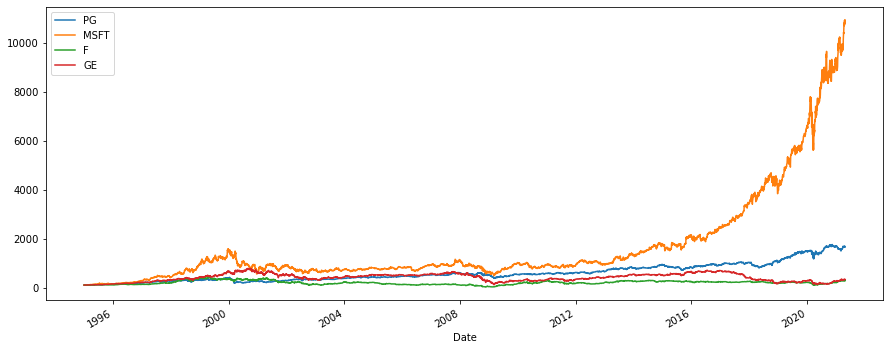

In [26]:
(mydata / mydata.iloc[0] * 100).plot(figsize=(15, 6))

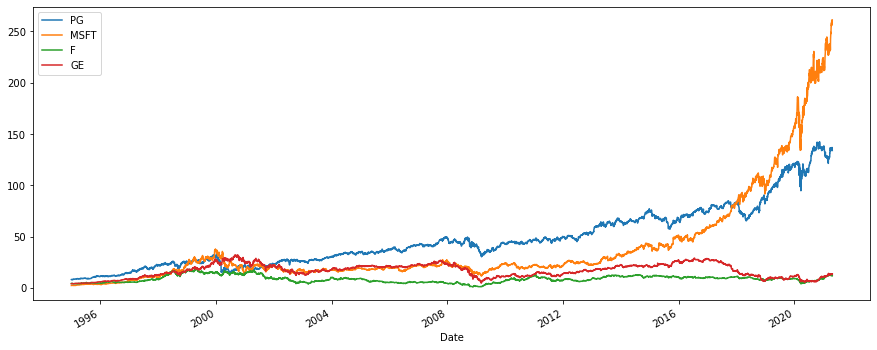

In [28]:
mydata.plot(figsize=(15, 6));

In [29]:
mydata.loc['1995-01-03']

PG      8.114557
MSFT    2.389259
F       4.380183
GE      4.119593
Name: 1995-01-03 00:00:00, dtype: float64

In [31]:
mydata.iloc[0]

PG      8.114557
MSFT    2.389259
F       4.380183
GE      4.119593
Name: 1995-01-03 00:00:00, dtype: float64

## Calculate return of the securities

In [33]:
returns = (mydata / mydata.shift(1)) - 1
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026905,0.000000
1995-01-05,-0.014142,-0.016495,-0.008733,0.002451
1995-01-06,0.002050,0.016772,0.000000,-0.004890
1995-01-09,-0.004090,-0.006186,0.017621,-0.009828


In [61]:
weights = np.array([0.25, 0.25, 0.25, 0.25])

In [35]:
np.dot(returns, weights)

array([        nan,  0.00653959, -0.00922975, ...,  0.01227723,
       -0.00015423,  0.01106038])

In [41]:
annual_returns = returns.mean() * 250
annual_returns

PG      0.131315
MSFT    0.226953
F       0.118323
GE      0.096490
dtype: float64

In [62]:
np.dot(annual_returns, weights)

0.14327025074346914

## Calculating the returns of indices

In [49]:
tickers = ["^GSPC", "^IXIC", "^GDAXI"]

ind_data = pd.DataFrame()

for t in tickers:
    ind_data[t] = wb.DataReader(t, data_source="yahoo", start="1997-1-1")["Adj Close"]

In [50]:
ind_data.head()

,^GSPC,^IXIC,^GDAXI
Date,,,
1997-01-02,737.010010,1280.699951,2820.810059
1997-01-03,748.030029,1310.680054,2863.260010
1997-01-06,747.650024,1316.400024,2890.199951
1997-01-07,753.229980,1327.729980,2876.340088
1997-01-08,748.409973,1320.349976,2904.080078


In [51]:
ind_data.tail()

,^GSPC,^IXIC,^GDAXI
Date,,,
2021-04-19,4163.259766,13914.769531,15368.389648
2021-04-20,4134.939941,13786.269531,15129.509766
2021-04-21,4173.419922,13950.219727,15195.969727
2021-04-22,4134.979980,13818.410156,15320.519531
2021-04-23,4180.169922,14016.809570,15279.620117


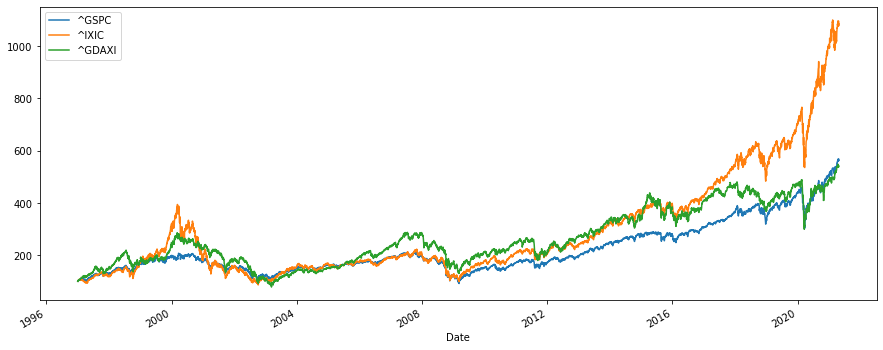

In [53]:
(ind_data / ind_data.iloc[0] * 100).plot(figsize=(15, 6));

In [54]:
ind_returns = (ind_data / ind_data.shift(1)) - 1
ind_returns.tail()

,^GSPC,^IXIC,^GDAXI
Date,,,
2021-04-19,-0.005307,-0.009790,-0.005910
2021-04-20,-0.006802,-0.009235,-0.015544
2021-04-21,0.009306,0.011892,0.004393
2021-04-22,-0.009211,-0.009449,0.008196
2021-04-23,0.010929,0.014358,-0.002670


In [55]:
annual_ind_returns = ind_returns.mean() * 250
annual_ind_returns

^GSPC     0.090255
^IXIC     0.129484
^GDAXI    0.081935
dtype: float64

In [56]:
tickers = ["PG", "^GSPC", "^DJI"]

data_2 = pd.DataFrame()
for t in tickers:
    data_2[t] = wb.DataReader(t, data_source="yahoo", start="2007-1-1")["Adj Close"]

In [57]:
data_2.tail()

,PG,^GSPC,^DJI
Date,,,
2021-04-19,135.741531,4163.259766,34077.628906
2021-04-20,136.874283,4134.939941,33821.300781
2021-04-21,135.980011,4173.419922,34137.308594
2021-04-22,134.630005,4134.979980,33815.898438
2021-04-23,133.940002,4180.169922,34043.488281


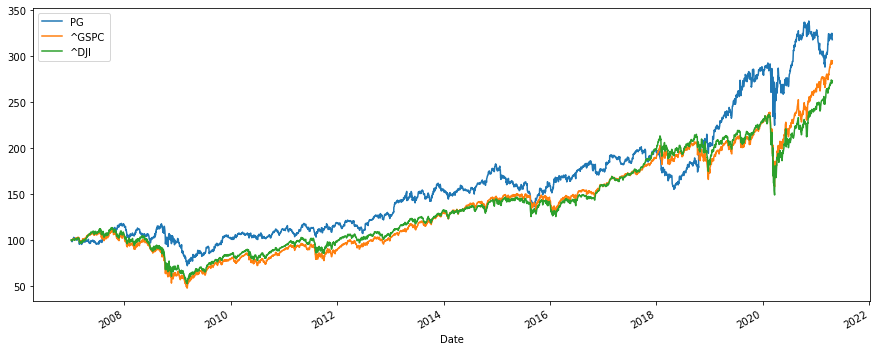

In [58]:
(data_2 / data_2.iloc[0] * 100).plot(figsize=(15, 6));